# Preparação dos dados

In [2]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Importar dataset

In [3]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)

## Criar o conjunto totalmente categórico
- Visualizar os gráficos e ver a distribuição das variáveis.
- Ver quantos outliers existem por variável

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nível_de_tensão               9790 non-null   object 
 1   ano                           9790 non-null   int64  
 2   mês                           9790 non-null   int64  
 3   energia_ativa_(kwh)           9790 non-null   float64
 4   cpes_doméstico                9790 non-null   float64
 5   cpes_iluminação_pública       9790 non-null   float64
 6   cpes_não_doméstico            9790 non-null   float64
 7   cpes_outros                   9790 non-null   float64
 8   cpes_mobilidade_eletrica_não  9790 non-null   float64
 9   cpes_mobilidade_eletrica_sim  9790 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 765.0+ KB


### Sabendo a estrutura de dados do dataset, existem algumas variáveis que são obviamente categóricas.
- São: nível_de_tensão, ano, mês
- Pode-se observar esse facto utilizando a função unique()

In [5]:
categorical_columns = ['nível_de_tensão', 'ano', 'mês']
for column in categorical_columns:
    print(f"Unique values in {column}: {merged_df[column].unique()}")


Unique values in nível_de_tensão: ['Baixa Tensão' 'Muito Alta, Alta e Média Tensões']
Unique values in ano: [2022 2023 2024]
Unique values in mês: [ 8  9 10 11 12  1  2  3  4  5  6  7]


- Transformar em categórico

In [6]:
merged_df['nível_de_tensão'] = merged_df['nível_de_tensão'].astype('category')
merged_df['ano'] = merged_df['ano'].astype('category')
merged_df['mês'] = merged_df['mês'].astype('category')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9790 entries, 0 to 9789
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   nível_de_tensão               9790 non-null   category
 1   ano                           9790 non-null   category
 2   mês                           9790 non-null   category
 3   energia_ativa_(kwh)           9790 non-null   float64 
 4   cpes_doméstico                9790 non-null   float64 
 5   cpes_iluminação_pública       9790 non-null   float64 
 6   cpes_não_doméstico            9790 non-null   float64 
 7   cpes_outros                   9790 non-null   float64 
 8   cpes_mobilidade_eletrica_não  9790 non-null   float64 
 9   cpes_mobilidade_eletrica_sim  9790 non-null   float64 
dtypes: category(3), float64(7)
memory usage: 564.8 KB


### Fazer discretização das variáveis contínuas para ordinais (para depois serem categóricas)

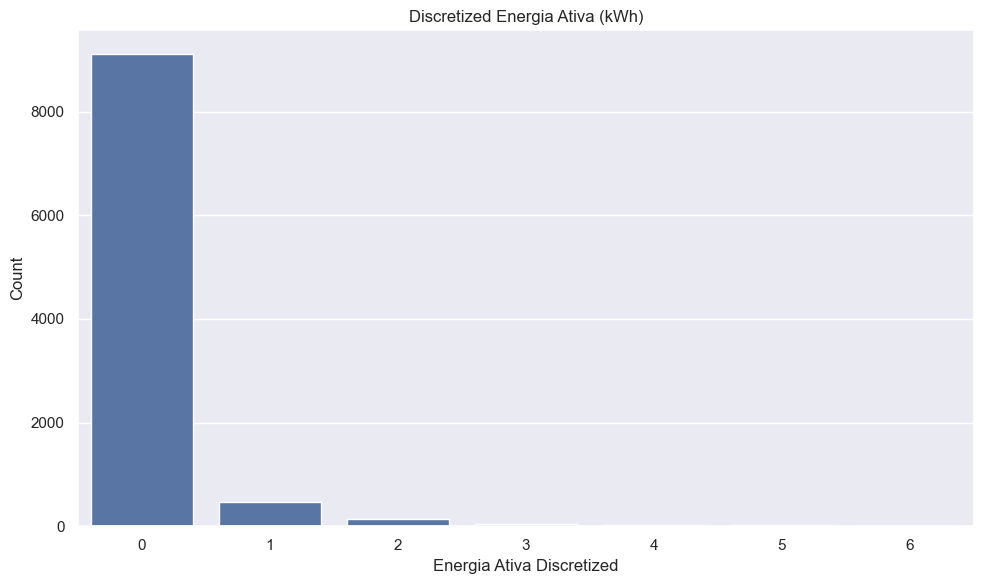

In [7]:
# Criar uma figura e eixo para o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Discretizar a coluna 'energia_ativa_(kwh)' usando cut com intervalos definidos
merged_df['energia_ativa_discretized'] = pd.cut(merged_df['energia_ativa_(kwh)'], bins=7, labels=False)

# Plotar gráfico de contagem para a coluna discretizada
sns.countplot(data=merged_df, x='energia_ativa_discretized', ax=ax)
ax.set_title('Discretized Energia Ativa (kWh)')
ax.set_xlabel('Energia Ativa Discretized')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [8]:
def max_outliers_energia_ativa(dataframe, coluna_energia_ativa, limite_superior=0.4*1e8):
  """
  Função para identificar outliers máximos na coluna 'energia_ativa_(kwh)'.
  """

  # Obter a coluna de energia ativa
  energia_ativa = dataframe[coluna_energia_ativa]

  # Filtrar outliers
  outliers = energia_ativa[energia_ativa > limite_superior]

  # Retornar os outliers
  return outliers

# Exemplo de uso (substitua 'merged_df' pelo nome do seu dataframe)
outliers_energia_ativa = max_outliers_energia_ativa(merged_df, 'energia_ativa_(kwh)')
print(f"Número de outliers: {len(outliers_energia_ativa)}")
print(outliers_energia_ativa.head())

Número de outliers: 271
1278    4.040138e+07
1279    5.023797e+07
1280    4.612451e+07
1281    5.119776e+07
1282    4.698027e+07
Name: energia_ativa_(kwh), dtype: float64


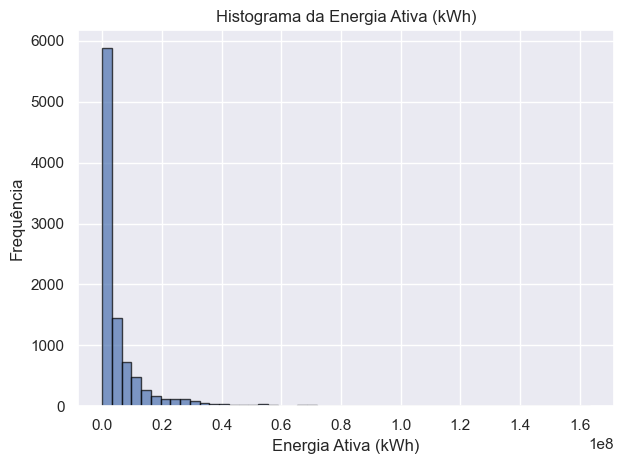

In [9]:
# Use your dataframe name 'merged_df'
data = merged_df  

# Select the 'energia_ativa_(kwh)' column
energia_ativa = data['energia_ativa_(kwh)']

# Create the histogram 
plt.hist(energia_ativa, bins=50, edgecolor='black', alpha=0.7)

# Add title and axis labels
plt.title('Histograma da Energia Ativa (kWh)')
plt.xlabel('Energia Ativa (kWh)')
plt.ylabel('Frequência')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [12]:
# Limite superior para outliers
limite_superior = 0.2*1e8

# Limite inferior para análise
limite_inferior = 0

# Obter a coluna 'energia_ativa_(kwh)'
energia_ativa = merged_df['energia_ativa_(kwh)']

# Contar linhas com valores entre os limites
linhas_na_faixa = energia_ativa[(energia_ativa >= limite_inferior) & (energia_ativa <= limite_superior)].count()

# Exibir o resultado
print(f"Número de linhas com energia ativa entre {limite_inferior} e {limite_superior}: {linhas_na_faixa}")


Número de linhas com energia ativa entre 0 e 20000000.0: 8984


In [16]:
# Limite superior para outliers
limite_superior = 1.63*1e8

# Limite inferior para análise
limite_inferior = 0.2*1e8

# Obter a coluna 'energia_ativa_(kwh)'
energia_ativa = merged_df['energia_ativa_(kwh)']

# Contar linhas com valores entre os limites
linhas_na_faixa = energia_ativa[(energia_ativa >= limite_inferior) & (energia_ativa <= limite_superior)].count()

# Exibir o resultado
print(f"Número de linhas com energia ativa entre {limite_inferior} e {limite_superior}: {linhas_na_faixa}")


Número de linhas com energia ativa entre 20000000.0 e 163000000.0: 805
